# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings 

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization



### Necessary Library Requirements:

#### Same as Lab1:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 sklearn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install and signup for `seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embedding and other deep information retrieval approaches.

![pic0](pics/pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [4]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [5]:
print(anger_train)

        id                                               text emotion  \
0    10000  How the fu*k! Who the heck! moved my fridge!.....   anger   
1    10001  So my Indian Uber driver just called someone t...   anger   
2    10002  @DPD_UK I asked for my parcel to be delivered ...   anger   
3    10003  so ef whichever butt wipe pulled the fire alar...   anger   
4    10004  Don't join @BTCare they put the phone down on ...   anger   
..     ...                                                ...     ...   
852  10852   rose incense are the best thing I've ever bought   anger   
853  10853         @jaaames1993 Literally burst out laughing.   anger   
854  10854           Follow up. Follow through. Be . #success   anger   
855  10855  Wrinkles should merely hide where frown have b...   anger   
856  10856  Love the new song I can't stop thinking about ...   anger   

     intensity  
0        0.938  
1        0.896  
2        0.896  
3        0.896  
4        0.896  
..         ...  
852 

In [6]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [7]:
print(train_df)

         id                                               text  emotion  \
0     10000  How the fu*k! Who the heck! moved my fridge!.....    anger   
1     10001  So my Indian Uber driver just called someone t...    anger   
2     10002  @DPD_UK I asked for my parcel to be delivered ...    anger   
3     10003  so ef whichever butt wipe pulled the fire alar...    anger   
4     10004  Don't join @BTCare they put the phone down on ...    anger   
...     ...                                                ...      ...   
3608  40781  @VivienLloyd Thank you so much! Just home - st...  sadness   
3609  40782              Just put the winter duvet on ☃️❄️🌬☔️   sadness   
3610  40783  @SilkInSide @TommyJoeRatliff that's so pretty!...  sadness   
3611  40784  @BluesfestByron second artist announcement loo...  sadness   
3612  40785  I can literally eat creamy pesto pasta topped ...  sadness   

      intensity  
0         0.938  
1         0.896  
2         0.896  
3         0.896  
4        

In [8]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [9]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [10]:
print(train_df)

         id                                               text emotion  \
2331  30327  Watch this amazing live.ly broadcast by @iamju...     joy   
501   10501  @UltimateBoxer My heart because you left me fo...   anger   
2698  30694  Never make a #decision when you're #angry and ...     joy   
1249  20392  When my 4yo is gone I blast gothcore music. Sh...    fear   
437   10437   @jwolfie_ why you gotta use the dark skin emoji    anger   
...     ...                                                ...     ...   
2241  30237  Elinor,' she laughed so little known, all over...     joy   
2182  30178  Time to go hit up the library - I have a lovel...     joy   
1842  20985  Good Morning!!!\n\n #leadership #healthcareIT ...    fear   
2659  30655  Well look at the bright side. You found a use ...     joy   
939   20082  r U scared to present in front of the class? s...    fear   

      intensity  
2331      0.542  
501       0.458  
2698      0.271  
1249      0.562  
437       0.479  
...

In [11]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [12]:
# Answer here
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import helpers.data_mining_helpers as dmh
# Lemmatizer helps to reduce words to the base form
# Refer to https://www.holisticseo.digital/python-seo/nltk/lemmatize
# “Nltk.stem.WordNetLemmatizer.lemmatize” method will lemmatize a word based on its context and its usage within the sentence.
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# Visual library
import seaborn as sns
import matplotlib.pyplot as plt
#Join all data by blank
train_text = ' '.join(train_df['text']) 
test_text = ' '.join(test_df['text'])
#Execute word_tokenize for joint text
train_word =word_tokenize(train_text)
test_word =word_tokenize(test_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LEOLIN_PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LEOLIN_PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
print(train_text)

Watch this amazing live.ly broadcast by @iamjustinburke  #musically @UltimateBoxer My heart because you left me for so long again\n\n*slight pout but it turned to a smile*\n\nheheh just kidding, no I'm fine- Never make a #decision when you're #angry and never make a #promise when you're . #wisewords When my 4yo is gone I blast gothcore music. She has #anxiety &amp; I can't listen 2 it around her bcuz it's 'too spooky'. *sigh* #momlife @jwolfie_ why you gotta use the dark skin emoji  @_haye_ optimism is he'll lose, that's actually a compromise :P What if.... the Metro LRT went over the Walterdale?!?! 😂 #yeg #levity @pixietangerine @hatersbackoff im so exited!! I am shaking so much 😍😍 and im so pround of Colleen and the fandom! Everyone is amazing 😍 Thank god the feds did not raise rates. Assume they are nervous about a world where 990 is the new employee  form  &amp; the safety net is zilch Online now !!!:) all day come play with me !! I'm happy happy horny playful sweet sour;) @peterco

In [14]:
train_word

['Watch',
 'this',
 'amazing',
 'live.ly',
 'broadcast',
 'by',
 '@',
 'iamjustinburke',
 '#',
 'musically',
 '@',
 'UltimateBoxer',
 'My',
 'heart',
 'because',
 'you',
 'left',
 'me',
 'for',
 'so',
 'long',
 'again\\n\\n',
 '*',
 'slight',
 'pout',
 'but',
 'it',
 'turned',
 'to',
 'a',
 'smile',
 '*',
 '\\n\\nheheh',
 'just',
 'kidding',
 ',',
 'no',
 'I',
 "'m",
 'fine-',
 'Never',
 'make',
 'a',
 '#',
 'decision',
 'when',
 'you',
 "'re",
 '#',
 'angry',
 'and',
 'never',
 'make',
 'a',
 '#',
 'promise',
 'when',
 'you',
 "'re",
 '.',
 '#',
 'wisewords',
 'When',
 'my',
 '4yo',
 'is',
 'gone',
 'I',
 'blast',
 'gothcore',
 'music',
 '.',
 'She',
 'has',
 '#',
 'anxiety',
 '&',
 'amp',
 ';',
 'I',
 'ca',
 "n't",
 'listen',
 '2',
 'it',
 'around',
 'her',
 'bcuz',
 'it',
 "'s",
 "'too",
 'spooky',
 "'",
 '.',
 '*',
 'sigh',
 '*',
 '#',
 'momlife',
 '@',
 'jwolfie_',
 'why',
 'you',
 'got',
 'ta',
 'use',
 'the',
 'dark',
 'skin',
 'emoji',
 '@',
 '_haye_',
 'optimism',
 'is',
 'he'

In [15]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
#Do some cleaning method 
def clean_words(new_tokens):
    #lower case all
    new_tokens = [t.lower() for t in new_tokens]
    #remove stopwords
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    #remove non alphabet letter
    new_tokens = [t for t in new_tokens if t.isalpha()]
    #Lemmatizer helps to reduce words to the base form
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens

In [17]:
import nltk
# omw is  Open Multilingual Wordnet --- read in wordnets, validate them, and search them.
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LEOLIN_PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
# do clean_words function for tokenized word(train_word)
cleantrain=clean_words(train_word)

In [19]:
# do clean_words function for tokenized word(test_word)
cleantest=clean_words(test_word)

In [20]:
#Use counter function to count words (Bag of word = BOW)
BOW_train=Counter(cleantrain)
BOW_test=Counter(cleantest)

In [22]:
#Test Emoji icon
"😍" in test_word

True

In [23]:
# Pick up two columns ('word' & 'frequency') and sorting
data_train=pd.DataFrame(BOW_train.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
data_test=pd.DataFrame(BOW_test.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

In [24]:
print(data_train)

             word  frequency
118          like        247
276           get        191
25            amp        182
137             u        155
245           one        149
...           ...        ...
4808        stunt          1
4806  downtrodden          1
4805        mayor          1
4800      ronaldo          1
8379   imediately          1

[8380 rows x 2 columns]


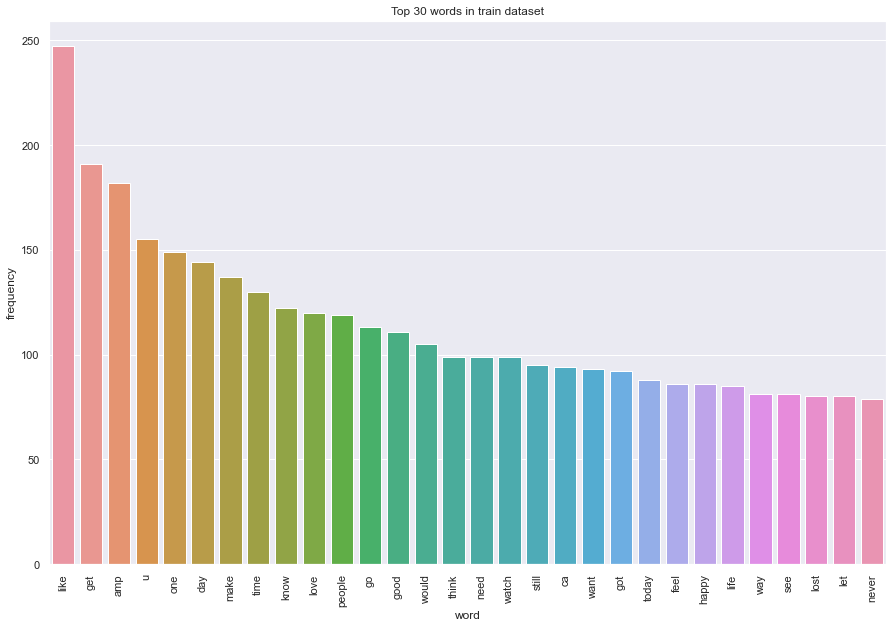

In [26]:
#Plot graph by matplotlib library for training data
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = [10, 5]
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=90)
ax=sns.barplot(y='frequency',x='word',data=data_train.head(30)).set_title('Top 30 words in train dataset')



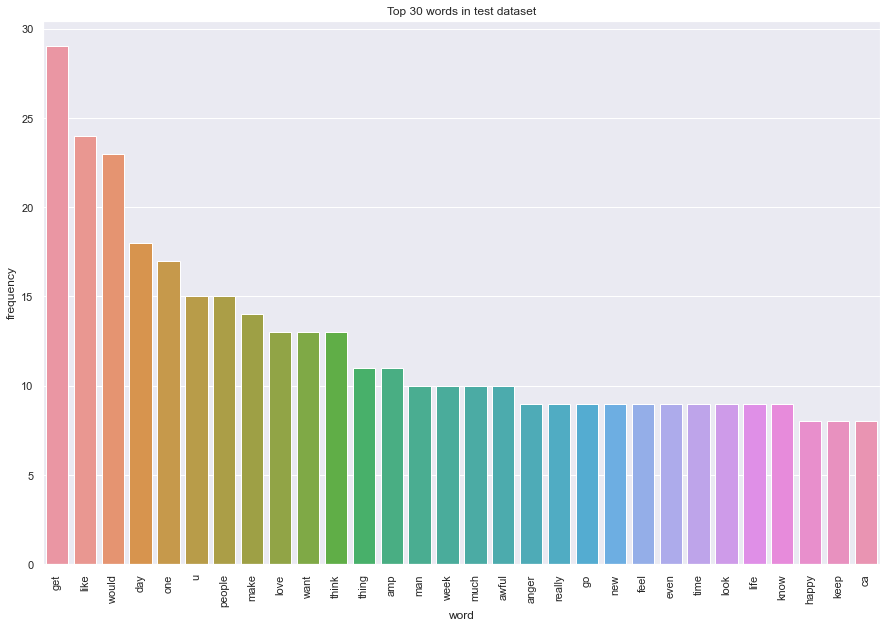

In [27]:
#Plot graph by matplotlib library for testing data
plt.xticks(rotation=90)
ax=sns.barplot(y='frequency',x='word',data=data_test.head(30)).set_title('Top 30 words in test dataset')

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [22]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [23]:
import pandas as pd
## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [28]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

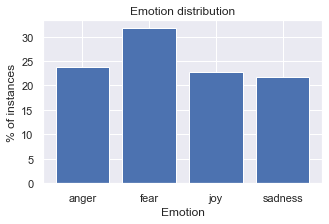

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
# build analyzers (bag-of-words) by sklearn.feature_extraction
BOW_vectorizer = CountVectorizer() 

In [32]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [33]:
print(train_data_BOW_features)

  (0, 507)	1
  (0, 1361)	1
  (0, 1461)	1
  (0, 4291)	1
  (0, 5239)	1
  (0, 5380)	1
  (0, 5936)	1
  (0, 9020)	1
  (0, 9688)	1
  (1, 374)	1
  (1, 999)	1
  (1, 1448)	1
  (1, 3264)	1
  (1, 3391)	1
  (1, 4042)	1
  (1, 4571)	1
  (1, 4798)	1
  (1, 4908)	1
  (1, 5107)	1
  (1, 5290)	1
  (1, 5577)	1
  (1, 5957)	1
  (1, 6126)	1
  (1, 6191)	1
  (1, 6957)	1
  :	:
  (3611, 9098)	1
  (3611, 9467)	1
  (3611, 9748)	1
  (3611, 10051)	1
  (3612, 602)	1
  (3612, 1666)	1
  (3612, 1785)	1
  (3612, 2427)	1
  (3612, 3489)	1
  (3612, 3650)	1
  (3612, 3723)	1
  (3612, 4351)	1
  (3612, 4383)	1
  (3612, 6371)	1
  (3612, 6517)	1
  (3612, 7001)	1
  (3612, 7744)	1
  (3612, 7832)	1
  (3612, 7976)	1
  (3612, 8306)	1
  (3612, 8924)	1
  (3612, 8930)	1
  (3612, 9119)	1
  (3612, 9452)	1
  (3612, 9779)	1


In [30]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [34]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [35]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [37]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[1:500]

array(['000', '00pm', '00tiffanyr', '01', '02', '03', '0303', '034', '04',
       '08', '080', '09', '095', '10', '100', '1000', '100000000', '100g',
       '100k', '100s', '101', '104', '10am', '10carley', '10golds24',
       '11', '1133', '119', '11yo', '12', '123', '13', '130', '133',
       '134', '13c', '14', '1400', '147', '148', '15', '1564',
       '15_jordyn', '15yrs', '16', '1607', '1616', '168', '169', '16k',
       '17', '18', '19', '1975', '1_full_plus_by_gora', '1c',
       '1dayatatime', '1n', '1nataliemaines', '1pet', '1st',
       '1stworldprobs4vs', '1tbsp', '1voicematters', '20', '2000', '2004',
       '2005', '2007', '2012', '2014', '2015', '2016', '2017', '2020',
       '20au', '20likes', '20th', '21st', '22', '23', '236', '23rd', '24',
       '244', '24th', '25', '25kish', '26', '27', '279', '28', '28th',
       '2am', '2b', '2day', '2hour', '2hr', '2k', '2k17', '2much', '2nd',
       '30', '300', '301', '30am', '30pm', '30s', '31', '32', '320',
       '339', '34'

In [35]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[0:110]

array(['00', '000', '00pm', '00tiffanyr', '01', '02', '03', '0303', '034',
       '04', '08', '080', '09', '095', '10', '100', '1000', '100000000',
       '100g', '100k', '100s', '101', '104', '10am', '10carley',
       '10golds24', '11', '1133', '119', '11yo', '12', '123', '13', '130',
       '133', '134', '13c', '14', '1400', '147', '148', '15', '1564',
       '15_jordyn', '15yrs', '16', '1607', '1616', '168', '169', '16k',
       '17', '18', '19', '1975', '1_full_plus_by_gora', '1c',
       '1dayatatime', '1n', '1nataliemaines', '1pet', '1st',
       '1stworldprobs4vs', '1tbsp', '1voicematters', '20', '2000', '2004',
       '2005', '2007', '2012', '2014', '2015', '2016', '2017', '2020',
       '20au', '20likes', '20th', '21st', '22', '23', '236', '23rd', '24',
       '244', '24th', '25', '25kish', '26', '27', '279', '28', '28th',
       '2am', '2b', '2day', '2hour', '2hr', '2k', '2k17', '2much', '2nd',
       '30', '300', '301', '30am', '30pm', '30s', '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [38]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [40]:
import nltk

# build analyzers (bag-of-words) by nltk.word_tokenize
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

D:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [41]:
train_data_BOW_features_500.toarray()

array([[ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  4,  0, ...,  0,  0,  0],
       ...,
       [ 3, 12,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 3,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [42]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[0:500]

array(['!', '#', '$', '%', '&', "'", "'d", "'ll", "'m", "'re", "'s",
       "'ve", '(', ')', '*', ',', '-', '--', '.', '..', '...', '....',
       '.....', '1', '2', '3', '4', ':', ';', '?', '@', '\\n', '\\n\\n',
       'a', 'about', 'absolutely', 'actually', 'afraid', 'after', 'again',
       'against', 'alarm', 'all', 'already', 'also', 'always', 'am',
       'amazing', 'amp', 'an', 'and', 'anger', 'angry', 'animated',
       'another', 'anxiety', 'any', 'anyone', 'anything', 'are', 'around',
       'as', 'asked', 'ass', 'at', 'away', 'awe', 'awful', 'back', 'bad',
       'bb18', 'bc', 'be', 'because', 'been', 'before', 'being',
       'believe', 'best', 'better', 'big', 'bit', 'bitter', 'black',
       'blues', 'boiling', 'both', 'break', 'bright', 'broadcast',
       'bully', 'burning', 'burst', 'but', 'by', 'ca', 'call', 'can',
       'car', 'care', 'change', 'cheer', 'cheerful', 'cheerfully',
       'cheering', 'cheery', 'come', 'comes', 'could', 'country', 'cry',
       'custome

In [40]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [44]:
# Answer here
#import TfidfVectorizer as feature extractor
from sklearn.feature_extraction.text import TfidfVectorizer
#fix feature numbers
number_features = 1000
#build analyzers by TfidfVectorizer package
Tfidfvertorizer = TfidfVectorizer(lowercase=True,
                            max_features= number_features, #top 1000 most important features
                            stop_words = "english")
# apply analyzer to training data
Tfidfvertorizer.fit(train_df['text'])
#Learn vocabulary and idf, return document-term matrix.
train_data_Tfidf_features = Tfidfvertorizer.fit_transform(train_df['text'])


In [47]:
## observe some feature names range from [100:110]
Tfidf_feature_names = Tfidfvertorizer.get_feature_names()
Tfidf_feature_names[100:110]

['blue',
 'blues',
 'body',
 'boiling',
 'book',
 'boss',
 'bought',
 'bout',
 'boy',
 'break']

In [49]:
print (train_data_Tfidf_features.shape)

(3613, 1000)



---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
# Transform training documents to document-term matrix.
X_train = BOW_500.transform(train_df['text'])
# For supervised learning, y_train = answer
y_train = train_df['emotion']

#Transform testing documents to document-term matrix.
X_test = BOW_500.transform(test_df['text'])
# prediction result = y_test 
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [53]:
print(X_train.shape)

(3613, 500)


In [54]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'anger', 'joy', 'joy', 'joy', 'joy', 'fear', 'fear',
       'fear', 'fear'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [57]:
## accuracy package
from sklearn.metrics import accuracy_score

#get accuracy_score for training data
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)

#get accuracy_score for testing data
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [58]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [49]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix
# calculate confusion matrix 
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [50]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

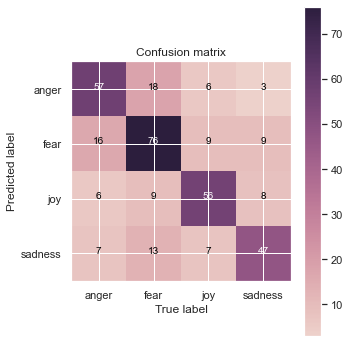

In [51]:
# plot your confusion matrix
# assign emotion list to my_tags
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here
We'll see how well the model predict each emotion label 
Total data counts is 347.
For anger, there are 84 records,model predict correctly 57 out of 84 records and mostly misinterprete with fear.
For fear, there are 110 records, model predict correctly 76 out of 110 records and mostly misinterprete with anger.
For joy, there are 79 records, model predict correctly 55 out of 79 records and mostly misinterprete with fear.
For sadness, there are 74 records, model predict correctly 47 out of 74 records and mostly misinterprete with fear.
If we check the materix by percentage,the best result of emotion is joy(accuracy: 74% )
Model usually misinterprete between fear and anger(predict anger as fear(16 records)/fear as anger(18 records))

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [60]:
# Answer here
#There are thre Naive Bayes models(BernoulliNB, MultinomialNB ans GaussianNB),  All of them are from naive bayes
#import split data package
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

#import split data package
from sklearn.model_selection import train_test_split

%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

#MultinomialNB model
mnb_counts = MultinomialNB()

#BernoulliNB model
bnb_counts=BernoulliNB()

#GaussianNB model
gnb_counts=GaussianNB()

In [61]:
X_train

<3613x500 sparse matrix of type '<class 'numpy.int64'>'
	with 42477 stored elements in Compressed Sparse Row format>

In [62]:
#USE training data to fit GaussianNB model
MNB_model=mnb_counts.fit(X_train, y_train) #MultinomialNB()

# predict training data
MNB_y_train_pred = MNB_model.predict(X_train)

# predict testing data
MNB_y_test_pred = MNB_model.predict(X_test)

##Show some prediction result
MNB_y_test_pred[:10]

array(['sadness', 'anger', 'joy', 'joy', 'anger', 'joy', 'fear', 'fear',
       'fear', 'anger'], dtype='<U7')

In [63]:
##USE training data to fit BernoulliNB model
BNB_model=bnb_counts.fit(X_train, y_train) #BernoulliNB

# predict training data
BNB_y_train_pred = BNB_model.predict(X_train)

# predict testing data
BNB_y_test_pred = BNB_model.predict(X_test)

# Show some prediction result
BNB_y_test_pred[:10]

array(['sadness', 'anger', 'joy', 'joy', 'sadness', 'joy', 'fear', 'fear',
       'fear', 'anger'], dtype='<U7')

In [64]:
##USE training data to fit GaussianNB model
GNB_model=gnb_counts.fit(X_train.todense(), y_train)

# predict training data
GNB_y_train_pred = GNB_model.predict(X_train.todense())

# predict testing data
GNB_y_test_pred = GNB_model.predict(X_test.todense())

# Show some prediction result
GNB_y_test_pred[:10]

D:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
D:\ProgramData\anaconda3\envs\env1\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array(['sadness', 'anger', 'joy', 'joy', 'joy', 'joy', 'fear', 'fear',
       'fear', 'anger'], dtype='<U7')

In [65]:
## accuracy package
from sklearn.metrics import accuracy_score

#get accuracy_score of MultinomialNB model for training data
MNB_acc_train = accuracy_score(y_true=y_train, y_pred=MNB_y_train_pred)

#get accuracy_score of MultinomialNB model for testing data
MNB_acc_test = accuracy_score(y_true=y_test, y_pred=MNB_y_test_pred)

#Print accuracy and set result format
print('training accuracy: {}'.format(round(MNB_acc_train, 2)))
print('testing accuracy: {}'.format(round(MNB_acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [66]:
# 
## precision, recall, f1-score of MultinomialNB model
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=MNB_y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [67]:
# Do the same thing for BernoulliNB model
## accuracy package
from sklearn.metrics import accuracy_score

#Get accuracy_score of BernoulliNB model for training data
BNB_acc_train = accuracy_score(y_true=y_train, y_pred=BNB_y_train_pred)

#Get accuracy_score of BernoulliNB model for testing data
BNB_acc_test = accuracy_score(y_true=y_test, y_pred=BNB_y_test_pred)

#print training and testing accuracy and set format
print('training accuracy: {}'.format(round(BNB_acc_train, 2)))
print('testing accuracy: {}'.format(round(BNB_acc_test, 2)))


training accuracy: 0.79
testing accuracy: 0.7


In [68]:
##import  precision, recall, f1-score  package
from sklearn.metrics import classification_report

##print precision, recall, f1-score of BernoulliNB model for testing data
print(classification_report(y_true=y_test, y_pred=BNB_y_test_pred))

              precision    recall  f1-score   support

       anger       0.61      0.68      0.64        84
        fear       0.74      0.76      0.75       110
         joy       0.81      0.68      0.74        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.70       347
weighted avg       0.71      0.70      0.70       347



In [61]:
# # Do the same thing for GaussianNB model 
## accuracy
from sklearn.metrics import accuracy_score

#Get accuracy_score of GaussianNB model for training data
GNB_acc_train = accuracy_score(y_true=y_train, y_pred=GNB_y_train_pred)

#Get accuracy_score of GaussianNB model for testing data
GNB_acc_test = accuracy_score(y_true=y_test, y_pred=GNB_y_test_pred)

#print training and testing accuracy of  GaussianNB model and set format
print('training accuracy: {}'.format(round(GNB_acc_train, 2)))
print('testing accuracy: {}'.format(round(GNB_acc_test, 2)))

training accuracy: 0.76
testing accuracy: 0.65


In [62]:
##import  precision, recall, f1-score  package
from sklearn.metrics import classification_report

##print precision, recall, f1-score of GaussianNB model for testing data
print(classification_report(y_true=y_test, y_pred=GNB_y_test_pred))

              precision    recall  f1-score   support

       anger       0.53      0.73      0.61        84
        fear       0.79      0.59      0.68       110
         joy       0.65      0.81      0.72        79
     sadness       0.69      0.47      0.56        74

    accuracy                           0.65       347
   macro avg       0.66      0.65      0.64       347
weighted avg       0.67      0.65      0.65       347



##  BernoulliNB and  MultinomialNB model got the same performance(avg : 0.70)
## but the weighted avg precision of BernoulliNB is 0.71.

In [63]:
## I check MultinomialNB model result by confusion matrix
from sklearn.metrics import confusion_matrix


MNB_cm = confusion_matrix(y_true=y_test, y_pred=MNB_y_test_pred) 
print(MNB_cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


In [65]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(MNB_cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(start=2.8, rot=.1,as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(MNB_cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(MNB_cm.shape[1]),
           yticks=np.arange(MNB_cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = MNB_cm.max() / 2.
    for i, j in itertools.product(range(MNB_cm.shape[0]), range(MNB_cm.shape[1])):
        plt.text(j, i, format(MNB_cm[i, j], fmt), horizontalalignment="center", color="white" if MNB_cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.grid(False)
    plt.show()

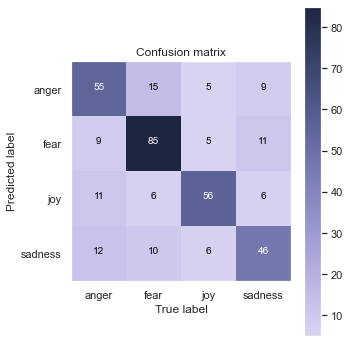

In [66]:
# plot your confusion matrix
# assign emotion list to my_tags
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(MNB_cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here
Overall Naive Bayes model(0.70) outperform the Decision Tree model(0.68) with the average precision, recall and F1 score (0.7 Vs 0.68) Compare between the two model.
Decision Trees is very flexible, easy to understand. However, it tends to overfit the training data, which we can see from the high training accuracy score(0.99) but low score in testing accuracy score(training 0.99 : testing 0.68). 

I list the weak reason of Decision tree is below:
a.Decision tree can be extremely sensitive to small perturbations in the data: a slight change can result in a drastically different tree.
b.Decision tree can easily overfit. This can be negated by validation methods and pruning, but this is a grey area.
c.Decision tree can have problems out-of-sample prediction (this is related to them being non-smooth).

As decision trees use the “divide and conquer” method, they tend to perform well if a few highly relevant attributes exist, but less so if many complex interactions are present. Decision tree pruning may neglect some key values in training data, which can lead the accuracy for a toss. 

While Naive bayes assume that there are no dependencies amongst attributes. This assumption is called class conditional independence. the classifier use probabilities principle does not require large amounts of data before learning can begin and computationally fast when making decisions.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [70]:
#I replace old keras to new onw(from keras to tensorflow version: 2.3)
# 
#from keras.models import Model
#from keras.layers import Input, Dense
#from keras.layers import ReLU, Softmax

#Use new Keras
import tensorflow as tf 
keras = tf.keras

#import all necessary packages
from tensorflow.keras.models import Sequential, Model, load_model, save_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D, Embedding
from tensorflow.keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Reshape, Dropout, Dense,Multiply, Dot, Concatenate,Embedding,ReLU, Softmax
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint



In [71]:
# standardize name (X, y) 
# Transform training documents to document-term matrix.
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

# Transform testing documents to document-term matrix.
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [72]:
## deal with label (string -> one-hot)
# One-hot encoding is a data preparation practice that makes certain kinds of data easier to work with or 
# actually readable by an algorithm. Specifically, one-hot encoding is often used on categorical data. 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2331      joy
501     anger
2698      joy
1249     fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [73]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [74]:

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

### 6.4 Train

In [78]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


D:\ProgramData\anaconda3\envs\env1\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 2s 4ms/step - loss: 1.3258 - accuracy: 0.3803 - val_loss: 1.2643 - val_accuracy: 0.4467
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9515 - accuracy: 0.6701 - val_loss: 0.9255 - val_accuracy: 0.6254
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.7924 - val_loss: 0.7571 - val_accuracy: 0.7032
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8505 - val_loss: 0.7816 - val_accuracy: 0.7089
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8840 - val_loss: 0.8396 - val_accuracy: 0.7003
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2768 - accuracy: 0.9017 - val_loss: 0.8514 - val_accuracy: 0.6888
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2267 - accuracy: 0.9186 - val_loss: 0.9399 - val_accuracy: 0.6715
Epoch 8/25
113/11

### 6.5 Predict on testing data

In [79]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[1.45268112e-01, 1.49154991e-01, 1.61672797e-05, 7.05560744e-01],
       [9.99922752e-01, 1.32669106e-06, 5.29121507e-06, 7.06262726e-05],
       [1.13447776e-07, 8.61441976e-08, 9.99999166e-01, 6.47851664e-07],
       [1.99877564e-03, 9.15741384e-01, 5.34523751e-05, 8.22064057e-02],
       [5.45283139e-04, 9.81044233e-01, 1.67316920e-03, 1.67373903e-02]],
      dtype=float32)

In [80]:
#from one hot encoding back to categorical data.  
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'anger', 'joy', 'fear', 'fear'], dtype=object)

In [81]:
#import accuracy_score package
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [82]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.380293,1.325792,0.446686,1.264271
1,1,0.670080,0.951492,0.625360,0.925521
2,2,0.792416,0.570090,0.703170,0.757139
3,3,0.850540,0.412010,0.708934,0.781572
4,4,0.884030,0.327748,0.700288,0.839617
5,5,0.901744,0.276800,0.688761,0.851437
6,6,0.918627,0.226724,0.671470,0.939934
7,7,0.939386,0.189787,0.680115,0.990531
8,8,0.946859,0.165479,0.688761,1.012363
9,9,0.956823,0.142013,0.685879,1.059540


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

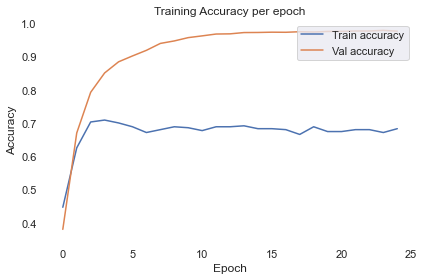

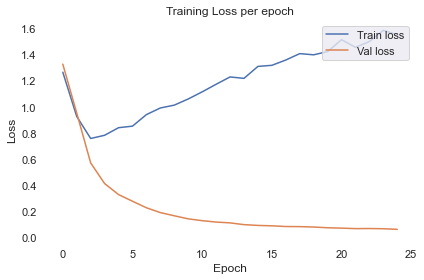

In [83]:
# Answer here
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True
plt.plot(training_log.epoch, training_log.val_accuracy)
plt.plot(training_log.epoch, training_log.accuracy)
ax = plt.gca()
ax.set_facecolor('none')
#plt.axes().patch.set_edgecolor('black')  
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(["Train accuracy", "Val accuracy"],loc=1)
plt.title("Training Accuracy per epoch")

plt.show()
plt.plot(training_log.epoch, training_log.val_loss)
plt.plot(training_log.epoch, training_log.loss)
ax = plt.gca()
ax.set_facecolor('none')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(["Train loss", "Val loss"],loc=1)
plt.title("Training Loss per epoch")

plt.show()

In [85]:
## The above result is very interesting. for training loss, as Epoch increased, the training loss also increased. 

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [87]:
## import gensim library
# Gensim is a free open-source Python library for representing documents as semantic vectors,
# as efficiently (computer-wise) and painlessly (human-wise) as possible.
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type after apply nltk.word_tokenize
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2331,30327,Watch this amazing live.ly broadcast by @iamju...,"[Watch, this, amazing, live.ly, broadcast, by,..."
501,10501,@UltimateBoxer My heart because you left me fo...,"[@, UltimateBoxer, My, heart, because, you, le..."
2698,30694,Never make a #decision when you're #angry and ...,"[Never, make, a, #, decision, when, you, 're, ..."
1249,20392,When my 4yo is gone I blast gothcore music. Sh...,"[When, my, 4yo, is, gone, I, blast, gothcore, ..."
437,10437,@jwolfie_ why you gotta use the dark skin emoji,"[@, jwolfie_, why, you, got, ta, use, the, dar..."


In [88]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Watch', 'this', 'amazing', 'live.ly', 'broadcast', 'by', '@', 'iamjustinburke', '#', 'musically']),
       list(['@', 'UltimateBoxer', 'My', 'heart', 'because', 'you', 'left', 'me', 'for', 'so', 'long', 'again\\n\\n', '*', 'slight', 'pout', 'but', 'it', 'turned', 'to', 'a', 'smile', '*', '\\n\\nheheh', 'just', 'kidding', ',', 'no', 'I', "'m", 'fine-']),
       list(['Never', 'make', 'a', '#', 'decision', 'when', 'you', "'re", '#', 'angry', 'and', 'never', 'make', 'a', '#', 'promise', 'when', 'you', "'re", '.', '#', 'wisewords'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [89]:
# The word2vec algorithms include skip-gram and CBOW models, using either hierarchical softmax or negative sampling
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
#  Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
# https://radimrehurek.com/gensim/models/word2vec.html?highlight=word2vec#module-gensim.models.word2vec

word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [97]:
# get the corresponding vector of a word "happy"
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.08757237,  0.1958138 ,  0.17416583,  0.9414673 , -0.40457737,
       -0.9859202 ,  0.69315094,  1.0543977 , -0.594443  , -0.2501269 ,
       -0.50581306, -0.18554226, -0.52113307, -0.11037369,  0.1464997 ,
       -0.28484225,  0.1803046 , -1.0007974 ,  0.47406   , -1.4582037 ,
        0.5207373 ,  0.5615255 ,  0.85120624, -0.15052101,  0.31926718,
        0.29297167, -0.8667063 ,  0.71218795, -0.25463623,  0.46495473,
        0.41943294,  0.18599892,  0.284355  , -0.26573873, -0.03212919,
        0.8154856 ,  0.46032792, -0.47432938, -1.1725761 , -0.43233764,
        0.09293375,  0.10437506, -0.25783417,  0.6595408 ,  0.7821403 ,
       -0.2325583 , -0.46439108,  0.15894008,  0.6894671 ,  0.33301148,
        0.1967096 , -0.60646254, -0.09374423,  0.00774588, -0.41247445,
       -0.51321095, -0.11649013, -0.39015034, -0.39252812, -0.15631573,
       -0.2103505 , -0.12762815,  0.9288205 ,  0.07343481, -0.88234663,
        0.40176183,  0.32083666,  0.5392896 , -1.5866022 ,  0.55

In [98]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9341341257095337),
 ('Be', 0.9241393208503723),
 ('bday', 0.9120453000068665),
 ("'be", 0.9023468494415283),
 ('O', 0.8997377157211304),
 ('dad', 0.8988739848136902),
 ('plz', 0.8975126147270203),
 ('free', 0.8955913782119751),
 ('cats', 0.8944955468177795),
 ('meant', 0.8879319429397583)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [99]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
#model_path = "GoogleNews-vectors-negative300.bin.gz"
#I use bin file instead of gz file because i can't download gz file on the website.
model_path = "GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

#test most_similar function
w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [100]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.917618453502655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [101]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


## Answer here
Word2Vec creates vectors of the words that are distributed numerical representations of word features – these word features could comprise of words that represent the context of the individual words present in our vocabulary. Word embeddings eventually help in establishing the association of a word with another similar meaning word through the created vectors. 

The word2vec algorithms include skip-gram and CBOW models, using either hierarchical softmax or negative sampling.
Two different model architectures that can be used by Word2Vec to create the word embeddings are:
a.The Continuous Bag of Words (CBOW) model:given context words as input, the, target word are predicted
b.The Skip-Gram model: given a target (centre) word, the context words are predicted

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [102]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [103]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Imgur](pics/pic6.png)

In [104]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [105]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [106]:
#word_list target
word_list = ['happy', 'angry', 'data', 'mining']

#Top 5 
topn = 5


happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE (2-dimension)

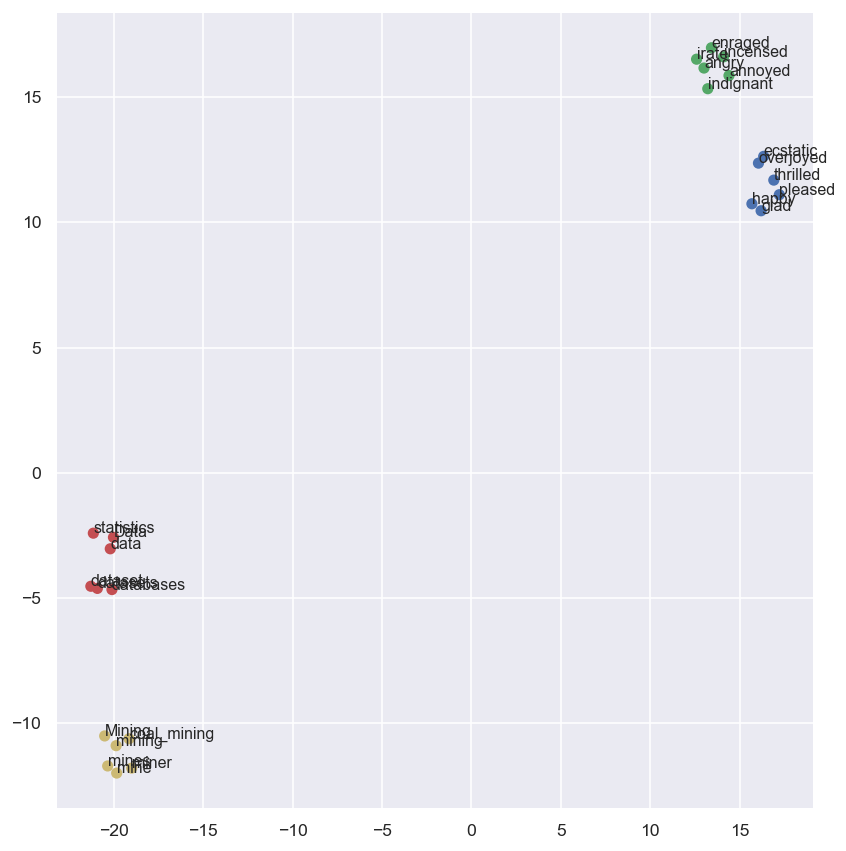

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [109]:
# Answer here
#word_list target
word_list = ['happy', 'angry', 'sad', 'fear']

#parameter= Top 15 words
topn = 15

#Use w2v_google_model to find the similar top 5.
#model_path = "GoogleNews-vectors-negative300.bin"
#w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

happy_words_15 = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words_15 = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words_15 = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]   
fear_words_15 = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]   

#print the result
print('happy_words_15: ', happy_words_15)
print('angry_words_15: ', angry_words_15)
print('sad_words_15: ', sad_words_15)
print('fear_words_15: ', fear_words_15)
target_words_60 = happy_words_15 + angry_words_15 + sad_words_15 + fear_words_15
print('\ntarget words: ')
print(target_words_60)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words_15:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words_15:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words_15:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words_15:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier',

---